In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from cv2 import imread
from PIL import Image
from matplotlib.image import imread

In [4]:
csvdmgp1 = pd.read_csv('esea_master_dmg_demos.part1.csv')
csvkillsp1 = pd.read_csv('esea_master_kills_demos.part1.csv')
csvdemosp1 = pd.read_csv('esea_meta_demos.part1.csv')
master_demos = pd.read_csv('mm_master_demos.csv', index_col=0)
map_data = pd.read_csv('map_data.csv', index_col=0)

In [5]:
allmaps = csvdemosp1['map'].unique()
allmaps

array(['de_overpass', 'de_cache', 'de_inferno', 'de_mirage', 'de_train',
       'de_dust2', 'de_cbble', 'de_nuke'], dtype=object)

In [6]:
# Há Jogos que podem não ter todas rondas!
filtered_csvdemosp1_Mirage = csvdemosp1[csvdemosp1['map'] == ('de_mirage')]
filtered_csvdemosp1_Mirage

file        map  round  start_seconds  end_seconds  \
85      esea_match_13779770.dem  de_mirage      2       203.8864     300.9222   
86      esea_match_13779770.dem  de_mirage      3       300.9222     383.8387   
87      esea_match_13779770.dem  de_mirage      4       383.8387     467.5534   
88      esea_match_13779770.dem  de_mirage      5       467.5534     627.0779   
89      esea_match_13779770.dem  de_mirage      6       627.0779     729.2011   
...                         ...        ...    ...            ...          ...   
215833  esea_match_13792994.dem  de_mirage     17      1366.3760    1417.0620   
215834  esea_match_13792994.dem  de_mirage     18      1417.0620    1476.2270   
215835  esea_match_13792994.dem  de_mirage     19      1476.2270    1583.1830   
215836  esea_match_13792994.dem  de_mirage     20      1583.1830    1715.0920   
215837  esea_match_13792994.dem  de_mirage     21      1715.0920    1773.0990   

       winner_team       winner_side round_type  ct_eq_val  t_eq_val  
85          Team 1  CounterTerrorist  FORCE_BUY      14200      7950  
86          Team 1  CounterTerrorist        ECO      18900      1600  
87          Team 2         Terrorist     NORMAL      25800     22200  
88          Team 1  CounterTerrorist     NORMAL      19800     24400  
89          Team 1  CounterTerrorist     NORMAL      18350     22250  
...            ...               ...        ...        ...       ...  
215833      Team 1         Terrorist   SEMI_ECO       6200     14700  
215834      Team 2  CounterTerrorist        ECO       1800     22050  
215835      Team 1         Terrorist  FORCE_BUY      29800     14650  
215836      Team 2  CounterTerrorist     NORMAL      12000     18650  
215837      Team 2  CounterTerrorist        ECO      22000      6700  

[75922 rows x 10 columns]

In [7]:
#Ver o que fazer com os que têm menos!
allfilesdmgp1 = csvdmgp1['file'].unique()
allfileskillsp1 = csvkillsp1['file'].unique()
allfilesdemosp1 = csvdemosp1['file'].unique()
print(len(allfilesdmgp1))
print(len(allfileskillsp1))
print(len(allfilesdemosp1))
allfiles = allfilesdemosp1
allfiles

8532
8620
8527


array(['esea_match_13770997.dem', 'esea_match_13779704.dem',
       'esea_match_13779769.dem', ..., 'esea_match_13793001.dem',
       'esea_match_13793017.dem', 'esea_match_13793043.dem'], dtype=object)

In [8]:
filtered_csvdemosp1_XGames = csvdemosp1[csvdemosp1['file'].isin(allfiles[:10])]
filtered_csvdemosp1_XGames

file          map  round  start_seconds  end_seconds  \
0    esea_match_13770997.dem  de_overpass      1       94.30782     160.9591   
1    esea_match_13770997.dem  de_overpass      2      160.95910     279.3998   
2    esea_match_13770997.dem  de_overpass      3      279.39980     341.0084   
3    esea_match_13770997.dem  de_overpass      4      341.00840     435.4259   
4    esea_match_13770997.dem  de_overpass      5      435.42590     484.2398   
..                       ...          ...    ...            ...          ...   
295  esea_match_13779787.dem     de_cache     25     2273.82000    2375.4220   
296  esea_match_13779787.dem     de_cache     26     2375.42200    2541.6240   
297  esea_match_13779787.dem     de_cache     27     2541.62400    2598.0520   
298  esea_match_13779787.dem     de_cache     28     2598.05200    2702.0800   
299  esea_match_13779787.dem     de_cache     29     2702.08000    2767.1490   

          winner_team       winner_side    round_type  ct_eq_val  t_eq_val  
0    Hentai Hooligans         Terrorist  PISTOL_ROUND       4300      4250  
1    Hentai Hooligans         Terrorist           ECO       6300     19400  
2    Hentai Hooligans         Terrorist      SEMI_ECO       7650     19250  
3    Hentai Hooligans         Terrorist        NORMAL      24900     23400  
4        Animal Style  CounterTerrorist           ECO       5400     20550  
..                ...               ...           ...        ...       ...  
295            Team 1         Terrorist           ECO       9750     25950  
296            Team 1         Terrorist      SEMI_ECO      11700     27250  
297            Team 2  CounterTerrorist        NORMAL      24750     23750  
298            Team 2  CounterTerrorist     FORCE_BUY      30300     15350  
299            Team 2  CounterTerrorist     FORCE_BUY      31350     14300  

[300 rows x 10 columns]

In [9]:
winner_val = []
mean_val = []
for i in range(len(filtered_csvdemosp1_XGames)):
    if filtered_csvdemosp1_XGames['winner_side'].iloc[i] == 'CounterTerrorist':
        winner_val.append(filtered_csvdemosp1_XGames['ct_eq_val'].iloc[i])
    else:
        winner_val.append(filtered_csvdemosp1_XGames['t_eq_val'].iloc[i])
    mean_val.append((filtered_csvdemosp1_XGames['ct_eq_val'].iloc[i]+filtered_csvdemosp1_XGames['t_eq_val'].iloc[i])/2)
filtered_csvdemosp1_XGames['winner_val'] = winner_val
filtered_csvdemosp1_XGames['mean_val'] = mean_val
filtered_csvdemosp1_XGames

C:\Users\User\AppData\Local\Temp\ipykernel_13492\3164522586.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_csvdemosp1_XGames['winner_val'] = winner_val
C:\Users\User\AppData\Local\Temp\ipykernel_13492\3164522586.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_csvdemosp1_XGames['mean_val'] = mean_val


file          map  round  start_seconds  end_seconds  \
0    esea_match_13770997.dem  de_overpass      1       94.30782     160.9591   
1    esea_match_13770997.dem  de_overpass      2      160.95910     279.3998   
2    esea_match_13770997.dem  de_overpass      3      279.39980     341.0084   
3    esea_match_13770997.dem  de_overpass      4      341.00840     435.4259   
4    esea_match_13770997.dem  de_overpass      5      435.42590     484.2398   
..                       ...          ...    ...            ...          ...   
295  esea_match_13779787.dem     de_cache     25     2273.82000    2375.4220   
296  esea_match_13779787.dem     de_cache     26     2375.42200    2541.6240   
297  esea_match_13779787.dem     de_cache     27     2541.62400    2598.0520   
298  esea_match_13779787.dem     de_cache     28     2598.05200    2702.0800   
299  esea_match_13779787.dem     de_cache     29     2702.08000    2767.1490   

          winner_team       winner_side    round_type  ct_eq_val  t_eq_val  \
0    Hentai Hooligans         Terrorist  PISTOL_ROUND       4300      4250   
1    Hentai Hooligans         Terrorist           ECO       6300     19400   
2    Hentai Hooligans         Terrorist      SEMI_ECO       7650     19250   
3    Hentai Hooligans         Terrorist        NORMAL      24900     23400   
4        Animal Style  CounterTerrorist           ECO       5400     20550   
..                ...               ...           ...        ...       ...   
295            Team 1         Terrorist           ECO       9750     25950   
296            Team 1         Terrorist      SEMI_ECO      11700     27250   
297            Team 2  CounterTerrorist        NORMAL      24750     23750   
298            Team 2  CounterTerrorist     FORCE_BUY      30300     15350   
299            Team 2  CounterTerrorist     FORCE_BUY      31350     14300   

     winner_val  mean_val  
0          4250    4275.0  
1         19400   12850.0  
2         19250   13450.0  
3         23400   24150.0  
4          5400   12975.0  
..          ...       ...  
295       25950   17850.0  
296       27250   19475.0  
297       24750   24250.0  
298       30300   22825.0  
299       31350   22825.0  

[300 rows x 12 columns]

In [10]:
alltyperounds = csvdemosp1['round_type'].unique()
alltyperounds

array(['PISTOL_ROUND', 'ECO', 'SEMI_ECO', 'NORMAL', 'FORCE_BUY'],
      dtype=object)

In [11]:
# round, ct_eq_val, winner_side, round_type, t_eq_val, mean_val
filtered_csvdemosp1_XGames = filtered_csvdemosp1_XGames.sort_values(by='round')
df_medias_por_ronda = (
    filtered_csvdemosp1_XGames
    .groupby('round')
    .agg({
        # Colunas numéricas (média)
        'ct_eq_val': 'mean',
        't_eq_val': 'mean',
        'winner_val': 'mean',
        'mean_val': 'mean',
        
        # Colunas categóricas (moda)
        'winner_side': lambda x: x.value_counts().idxmax(),  # Moda com Pandas
        'round_type': lambda x: x.value_counts().idxmax()    # Moda com Pandas
    })
    .reset_index()  # Para transformar 'round' em coluna novamente
)

# Arredondar as médias (opcional)
numeric_cols = ['ct_eq_val', 't_eq_val', 'winner_val', 'mean_val']
df_medias_por_ronda[numeric_cols] = df_medias_por_ronda[numeric_cols].round(2)
df_medias_por_ronda

round  ct_eq_val  t_eq_val  winner_val  mean_val       winner_side  \
0       1    4088.89   4033.33     4066.67   4061.11  CounterTerrorist   
1       2   14075.00   8840.00    15380.00  11457.50  CounterTerrorist   
2       3   16720.00  13305.00    20180.00  15012.50         Terrorist   
3       4   21090.00  18605.00    22850.00  19847.50         Terrorist   
4       5   22390.00  20740.00    21300.00  21565.00         Terrorist   
5       6   18070.00  23395.00    21695.00  20732.50         Terrorist   
6       7   20630.00  21725.00    20040.00  21177.50         Terrorist   
7       8   13445.00  22560.00    20100.00  18002.50  CounterTerrorist   
8       9   25615.00  18595.00    24740.00  22105.00  CounterTerrorist   
9      10   25075.00  14835.00    23350.00  19955.00         Terrorist   
10     11   26010.00  20305.00    25400.00  23157.50  CounterTerrorist   
11     12   20550.00  18450.00    20755.00  19500.00         Terrorist   
12     13   21990.00  19820.00    18445.00  20905.00  CounterTerrorist   
13     14   21650.00  19800.00    21935.00  20725.00  CounterTerrorist   
14     15   13780.00  15715.00    15430.00  14747.50         Terrorist   
15     16    7237.50   6331.25     8762.50   6784.38  CounterTerrorist   
16     17   15865.00  11075.00    19105.00  13470.00  CounterTerrorist   
17     18   19320.00   8590.00    19150.00  13955.00  CounterTerrorist   
18     19   24710.00  24310.00    25900.00  24510.00         Terrorist   
19     20   18655.00  18555.00    24920.00  18605.00  CounterTerrorist   
20     21   24275.00  21290.00    21800.00  22782.50  CounterTerrorist   
21     22   22340.00  19455.00    23185.00  20897.50         Terrorist   
22     23   22261.11  21305.56    23088.89  21783.33         Terrorist   
23     24   19844.44  23077.78    23827.78  21461.11  CounterTerrorist   
24     25   22922.22  20544.44    27872.22  21733.33  CounterTerrorist   
25     26   25818.75  20687.50    23893.75  23253.12         Terrorist   
26     27   22406.25  25012.50    27431.25  23709.38         Terrorist   
27     28   22400.00  21714.29    21900.00  22057.14  CounterTerrorist   
28     29   27714.29  20942.86    25492.86  24328.57  CounterTerrorist   
29     30   26566.67  28816.67    31516.67  27691.67  CounterTerrorist   
30     31   31025.00  28475.00    30475.00  29750.00         Terrorist   
31     32   34525.00  27625.00    30700.00  31075.00  CounterTerrorist   
32     33   33550.00  23375.00    29800.00  28462.50  CounterTerrorist   
33     34   33575.00  25275.00    28025.00  29425.00         Terrorist   
34     35   33100.00  27150.00    33100.00  30125.00  CounterTerrorist   
35     36   32975.00  27225.00    27950.00  30100.00  CounterTerrorist   
36     37   31375.00  27700.00    29300.00  29537.50  CounterTerrorist   
37     38   30600.00  27700.00    29350.00  29150.00         Terrorist   
38     39   29925.00  27400.00    29925.00  28662.50  CounterTerrorist   
39     40   28600.00  27650.00    27650.00  28125.00         Terrorist   
40     41   32300.00  28150.00    28150.00  30225.00         Terrorist   
41     42   31850.00  24500.00    24500.00  28175.00         Terrorist   
42     43   32950.00  26550.00    32950.00  29750.00  CounterTerrorist   
43     44   33850.00  28200.00    33850.00  31025.00  CounterTerrorist   

      round_type  
0   PISTOL_ROUND  
1            ECO  
2            ECO  
3         NORMAL  
4         NORMAL  
5         NORMAL  
6         NORMAL  
7            ECO  
8         NORMAL  
9            ECO  
10        NORMAL  
11           ECO  
12        NORMAL  
13        NORMAL  
14        NORMAL  
15  PISTOL_ROUND  
16           ECO  
17           ECO  
18        NORMAL  
19           ECO  
20        NORMAL  
21        NORMAL  
22        NORMAL  
23        NORMAL  
24        NORMAL  
25        NORMAL  
26        NORMAL  
27        NORMAL  
28        NORMAL  
29        NORMAL  
30        NORMAL  
31        NORMAL  
32        NORMAL  
33        NORMAL  
34      

In [12]:
def scatterPlotData(csvdemosp1,x,maps,allfiles):
    #-1
    filtered_csvdemosp1_XGames = csvdemosp1[csvdemosp1['file'].isin(allfiles[:x])]
    #-2
    filtered_csvdemosp1_XGames_XMaps = filtered_csvdemosp1_XGames[filtered_csvdemosp1_XGames['map'].isin(maps)]
    #-3
    winner_val = []
    mean_val = []
    for i in range(len(filtered_csvdemosp1_XGames_XMaps)):
        if filtered_csvdemosp1_XGames_XMaps['winner_side'].iloc[i] == 'CounterTerrorist':
            winner_val.append(filtered_csvdemosp1_XGames_XMaps['ct_eq_val'].iloc[i])
        else:
            winner_val.append(filtered_csvdemosp1_XGames_XMaps['t_eq_val'].iloc[i])
        mean_val.append((filtered_csvdemosp1_XGames_XMaps['ct_eq_val'].iloc[i]+filtered_csvdemosp1_XGames_XMaps['t_eq_val'].iloc[i])/2)
    filtered_csvdemosp1_XGames_XMaps['winner_val'] = winner_val
    filtered_csvdemosp1_XGames_XMaps['mean_val'] = mean_val
    #-4
    filtered_csvdemosp1_XGames_XMaps = filtered_csvdemosp1_XGames_XMaps.sort_values(by='round')
    df_medias_por_ronda = (
        filtered_csvdemosp1_XGames_XMaps
        .groupby('round')
        .agg({
            # Colunas numéricas (média)
            'ct_eq_val': 'mean',
            't_eq_val': 'mean',
            'winner_val': 'mean',
            'mean_val': 'mean',
            
            # Colunas categóricas (moda)
            'winner_side': lambda x: x.value_counts().idxmax(),  # Moda com Pandas
            'round_type': lambda x: x.value_counts().idxmax()    # Moda com Pandas
        })
        .reset_index()  # Para transformar 'round' em coluna novamente
    )
    # Arredondar as médias (opcional)
    numeric_cols = ['ct_eq_val', 't_eq_val', 'winner_val', 'mean_val']
    df_medias_por_ronda[numeric_cols] = df_medias_por_ronda[numeric_cols].round(2)
    #-5
    return df_medias_por_ronda
    

C:\Users\User\AppData\Local\Temp\ipykernel_13492\262562504.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_csvdemosp1_XGames_XMaps['winner_val'] = winner_val
C:\Users\User\AppData\Local\Temp\ipykernel_13492\262562504.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_csvdemosp1_XGames_XMaps['mean_val'] = mean_val


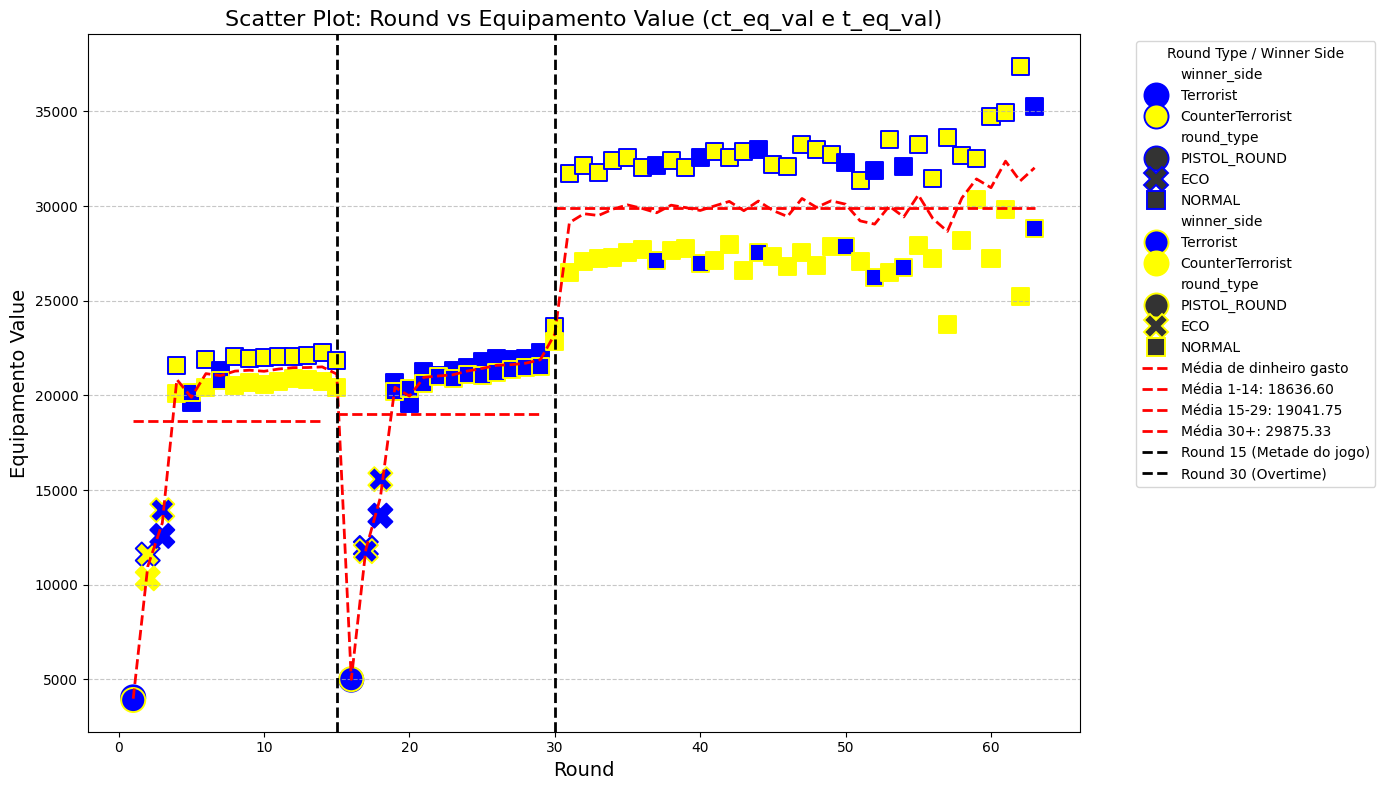

In [13]:
# Mapas - 'de_overpass', 'de_cache', 'de_inferno', 'de_mirage', 'de_train','de_dust2', 'de_cbble', 'de_nuke'
len_games = 8620
maps = ['de_mirage','de_dust2','de_nuke','de_cache','de_inferno','de_overpass','de_train']
df_medias_por_ronda = scatterPlotData(csvdemosp1,len_games,maps,allfiles)

media_1_14 = df_medias_por_ronda[df_medias_por_ronda['round'].between(1, 14)]['mean_val'].mean()
media_15_29 = df_medias_por_ronda[df_medias_por_ronda['round'].between(15, 29)]['mean_val'].mean()
media_30_mais = df_medias_por_ronda[df_medias_por_ronda['round'] >= 30]['mean_val'].mean()

max_rounds = df_medias_por_ronda['round'].max()

colors = sns.color_palette("husl", n_colors=len(df_medias_por_ronda['winner_side'].unique()))
colors =['blue','yellow']

plt.figure(figsize=(14, 8))
sns.scatterplot(
    x='round',          # Eixo x: round
    y='ct_eq_val',      # Eixo y: valor do equipamento dos Counter-Terrorists
    hue='winner_side',   # Cor baseada no round_type
    style='round_type', # Símbolo baseado no round_type
    palette=colors,     # Paleta de cores para os símbolos
    data=df_medias_por_ronda,            # DataFrame
    s=300,              # Tamanho dos pontos
    markers=True,       # Usar símbolos diferentes para cada round_type
    legend='auto',      # Adicionar legenda automaticamente
    edgecolor='blue'
)
sns.scatterplot(
    x='round',          # Eixo x: round
    y='t_eq_val',       # Eixo y: valor do equipamento dos Terrorists
    hue='winner_side',   # Cor baseada no round_type
    style='round_type', # Símbolo baseado no round_type
    palette=colors,     # Paleta de cores para os símbolos
    data=df_medias_por_ronda,            # DataFrame
    s=300,              # Tamanho dos pontos
    markers=True,       # Usar símbolos diferentes para cada round_type
    legend='auto',      # Adicionar legenda automaticamente
    edgecolor='yellow'
)
plt.plot(
    'round',          # nome da coluna x
    'mean_val',       # nome da coluna y
    data=df_medias_por_ronda,  # DataFrame de origem
    color='red',
    linestyle='--',
    linewidth=2,
    label='Média de dinheiro gasto'
)
plt.hlines(
    y=media_1_14, 
    xmin=1, 
    xmax=14, 
    color='red',
    linestyle='--', 
    linewidth=2, 
    label=f'Média 1-14: {media_1_14:.2f}'
)
plt.hlines(
    y=media_15_29, 
    xmin=15, 
    xmax=29, 
    color='red', 
    linestyle='--',
    linewidth=2, 
    label=f'Média 15-29: {media_15_29:.2f}'
)
plt.hlines(
    y=media_30_mais, 
    xmin=30, 
    xmax=max_rounds, 
    color='red', 
    linestyle='--',
    linewidth=2, 
    label=f'Média 30+: {media_30_mais:.2f}'
)

plt.axvline(x=15, color='black', linestyle='--', linewidth=2, label='Round 15 (Metade do jogo)')
plt.axvline(x=30, color='black', linestyle='--', linewidth=2, label='Round 30 (Overtime)')
plt.title('Scatter Plot: Round vs Equipamento Value (ct_eq_val e t_eq_val)', fontsize=16)
plt.xlabel('Round', fontsize=14)
plt.ylabel('Equipamento Value', fontsize=14)
plt.legend(title='Round Type / Winner Side', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [14]:
def scatterPlotData(data,data_demos,x,maps,allfiles):
    #-1
    data_demos = data_demos[data_demos['file'].isin(allfiles[:x])]
    #-2
    data_demos = data_demos[data_demos['map'].isin(maps)]
    demos_unique = data_demos['file'].unique()
    filtered_csvdata_XGames_XMaps = data[data['file'].isin(demos_unique)]
    #-3
    return filtered_csvdata_XGames_XMaps

In [15]:
filtered_csvdmgp1 = scatterPlotData(csvdmgp1,csvdemosp1,len_games,maps,allfiles)
filtered_killsp1 = scatterPlotData(csvkillsp1,csvdemosp1,len_games,maps,allfiles)
filtered_csvdemosp1 = scatterPlotData(csvdemosp1,csvdemosp1,len_games,maps,allfiles)

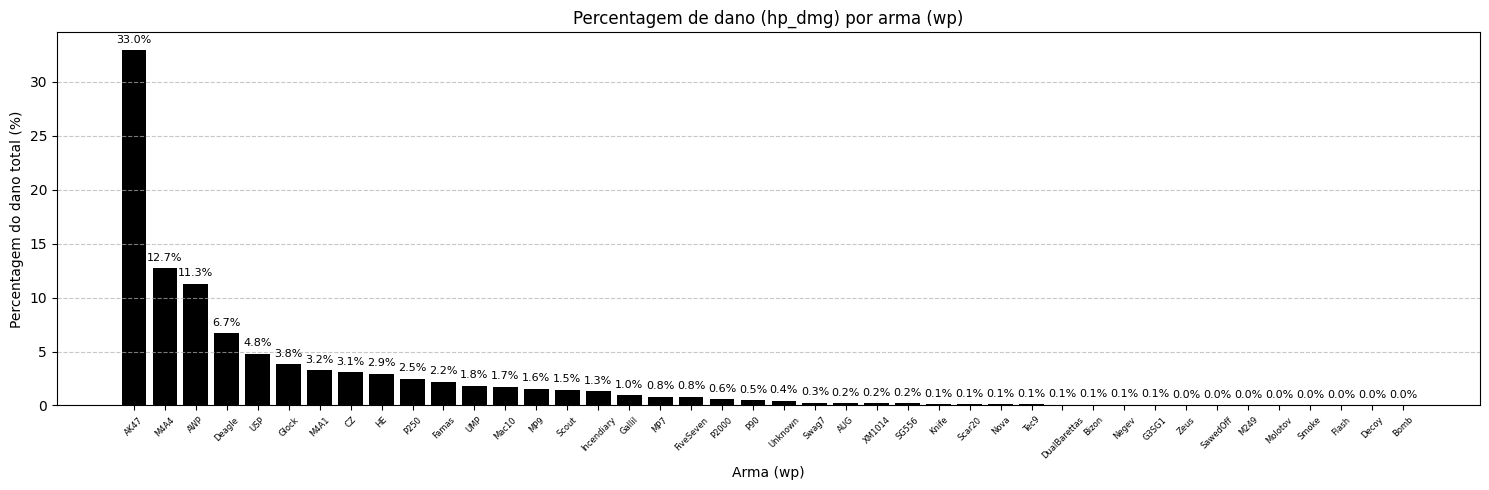

In [16]:
grouped_df = filtered_csvdmgp1.groupby('wp')['hp_dmg'].sum().reset_index()
grouped_df = grouped_df.sort_values(by='hp_dmg', ascending=False)
total_hp_dmg = grouped_df['hp_dmg'].sum()
grouped_df['percentagem'] = (grouped_df['hp_dmg'] / total_hp_dmg) * 100
plt.figure(figsize=(15, 5))
bars = plt.bar(grouped_df['wp'], grouped_df['percentagem'], color='black')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Posição X do texto (centro da barra)
        height + 0.5,  # Posição Y do texto (ligeiramente acima da barra)
        f'{height:.1f}%',  # Texto (1 casa decimal)
        ha='center',  # Alinhamento horizontal
        va='bottom',  # Alinhamento vertical
        fontsize=8
    )
plt.title('Percentagem de dano (hp_dmg) por arma (wp)')
plt.xlabel('Arma (wp)')
plt.ylabel('Percentagem do dano total (%)')
plt.xticks(rotation=45, fontsize=6)  # Rotacionar rótulos do eixo X para melhor legibilidade
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Linhas de grade horizontais
plt.tight_layout()  # Ajustar layout para evitar cortes
plt.show()

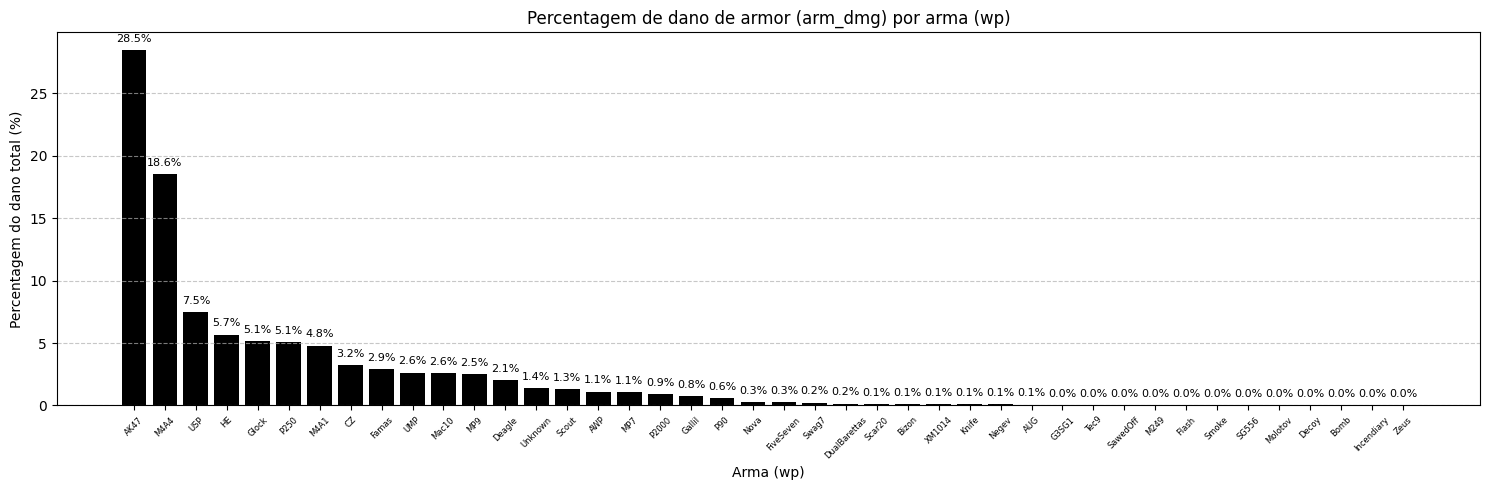

In [17]:
grouped_df = filtered_csvdmgp1.groupby('wp')['arm_dmg'].sum().reset_index()
grouped_df = grouped_df.sort_values(by='arm_dmg', ascending=False)
total_arm_dmg = grouped_df['arm_dmg'].sum()
grouped_df['percentagem'] = (grouped_df['arm_dmg'] / total_arm_dmg) * 100
plt.figure(figsize=(15, 5))
bars = plt.bar(grouped_df['wp'], grouped_df['percentagem'], color='black')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Posição X do texto (centro da barra)
        height + 0.5,  # Posição Y do texto (ligeiramente acima da barra)
        f'{height:.1f}%',  # Texto (1 casa decimal)
        ha='center',  # Alinhamento horizontal
        va='bottom',  # Alinhamento vertical
        fontsize=8
    )
plt.title('Percentagem de dano de armor (arm_dmg) por arma (wp)')
plt.xlabel('Arma (wp)')
plt.ylabel('Percentagem do dano total (%)')
plt.xticks(rotation=45, fontsize=6)  # Rotacionar rótulos do eixo X para melhor legibilidade
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Linhas de grade horizontais
plt.tight_layout()  # Ajustar layout para evitar cortes
plt.show()

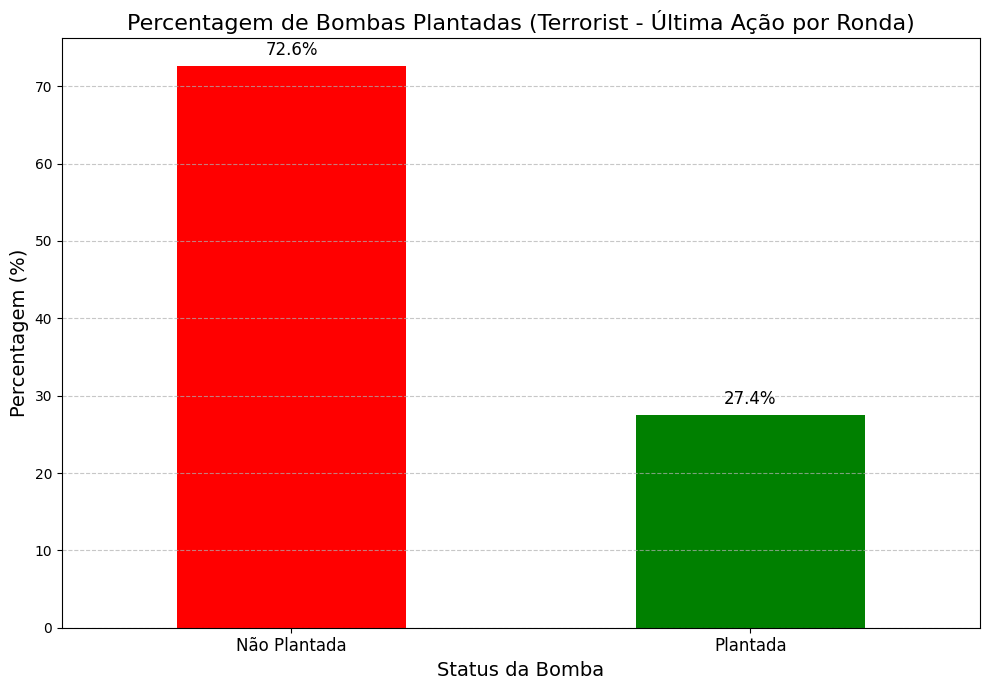

In [18]:
last_actions = filtered_killsp1.groupby(['file', 'round']).tail(1)
terrorist_last_actions = last_actions[last_actions['vic_side'] == 'Terrorist']
bomb_counts = terrorist_last_actions['is_bomb_planted'].value_counts()
total_actions = bomb_counts.sum()
bomb_percentages = (bomb_counts / total_actions) * 100
plt.figure(figsize=(10, 7))
bars = bomb_percentages.plot(kind='bar', color=['red', 'green'])
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Posição X (centro da barra)
        height + 1,  # Posição Y (ligeiramente acima)
        f'{height:.1f}%',  # Texto (1 casa decimal)
        ha='center',  # Alinhamento horizontal
        va='bottom',  # Alinhamento vertical
        fontsize=12
    )
plt.title('Percentagem de Bombas Plantadas (Terrorist - Última Ação por Ronda)', fontsize=16)
plt.xlabel('Status da Bomba', fontsize=14)
plt.ylabel('Percentagem (%)', fontsize=14)
plt.xticks([0, 1], ['Não Plantada', 'Plantada'], rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [18]:
grouped_df = filtered_csvdmgp1['vic_side']
counts = grouped_df.value_counts()

total = counts['CounterTerrorist'] + counts['Terrorist']

(counts['CounterTerrorist']/ total)*100

np.float64(47.18100623011147)

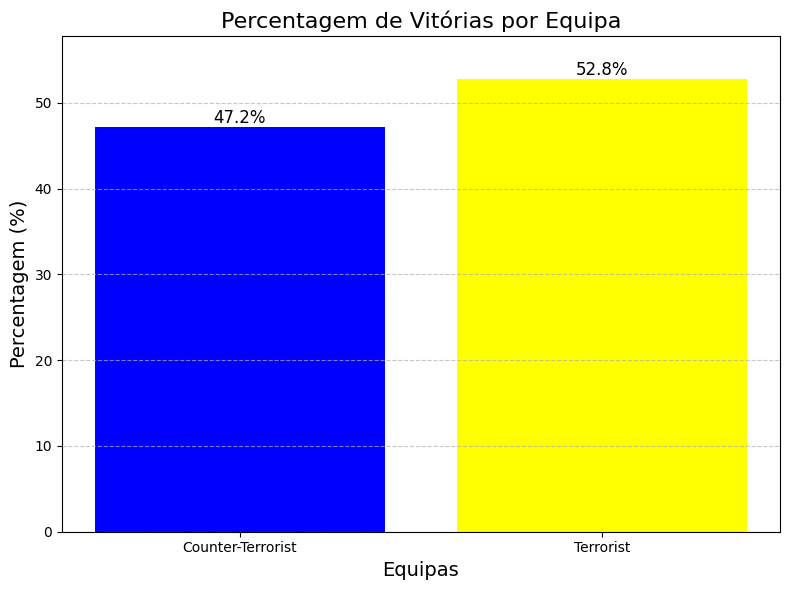

In [19]:
grouped_df = filtered_csvdmgp1['vic_side']
counts = grouped_df.value_counts()

# Calcular totais e percentagens
total = counts.sum()
ct_percent = (counts['CounterTerrorist'] / total) * 100
t_percent = (counts['Terrorist'] / total) * 100

# Criar o gráfico
plt.figure(figsize=(8, 6))
bars = plt.bar(['Counter-Terrorist', 'Terrorist'], [ct_percent, t_percent], 
               color=['blue', 'yellow'])

# Adicionar os valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom', fontsize=12)

plt.title('Percentagem de Vitórias por Equipa', fontsize=16)
plt.xlabel('Equipas', fontsize=14)
plt.ylabel('Percentagem (%)', fontsize=14)
plt.ylim(0, max(ct_percent, t_percent) + 5)  # Deixar espaço para o texto
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [20]:
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Só mostra label se > 0%
            plt.text(
                bar.get_x() + bar.get_width()/2,
                height + 1,
                f'{height:.1f}%',
                ha='center',
                va='bottom',
                fontsize=10
            )

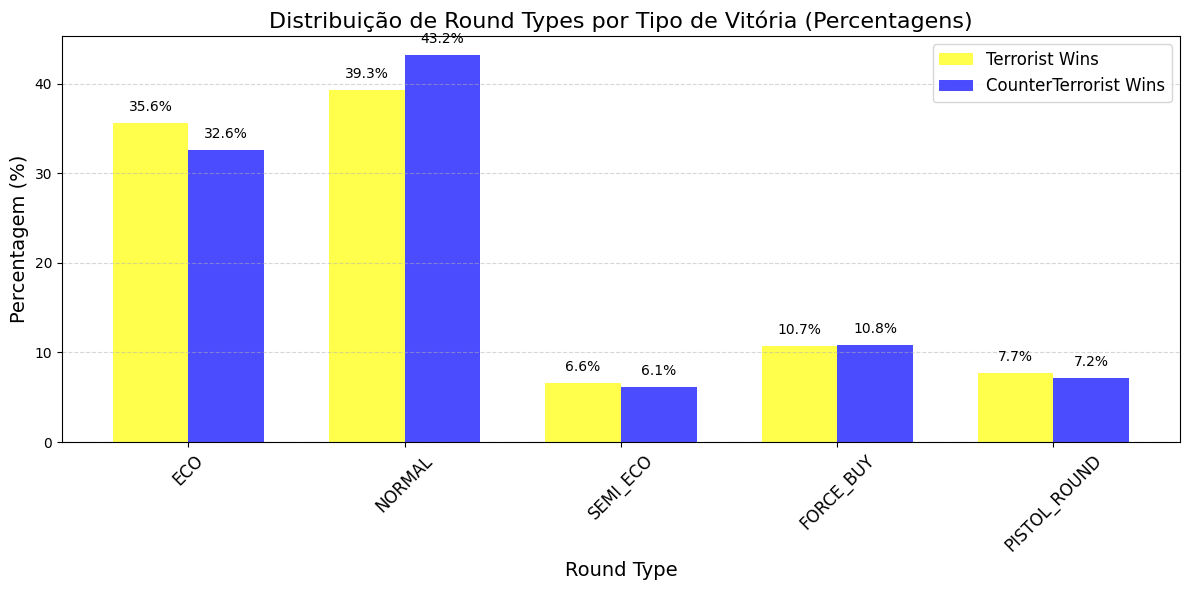

In [21]:
t_wins = filtered_csvdemosp1[filtered_csvdemosp1['winner_side'] == 'Terrorist']
ct_wins = filtered_csvdemosp1[filtered_csvdemosp1['winner_side'] == 'CounterTerrorist']
round_type_counts_t = t_wins['round_type'].value_counts(normalize=True) * 100
round_type_counts_ct = ct_wins['round_type'].value_counts(normalize=True) * 100
common_categories = list(set(round_type_counts_t.index) | set(round_type_counts_ct.index))
round_type_counts_t = round_type_counts_t.reindex(common_categories, fill_value=0)
round_type_counts_ct = round_type_counts_ct.reindex(common_categories, fill_value=0)
bar_width = 0.35
index = np.arange(len(common_categories))

plt.figure(figsize=(12, 6))
bars_t = plt.bar(
    index - bar_width/2, 
    round_type_counts_t, 
    width=bar_width, 
    color='yellow', 
    alpha=0.7, 
    label='Terrorist Wins'
)
bars_ct = plt.bar(
    index + bar_width/2, 
    round_type_counts_ct, 
    width=bar_width, 
    color='blue', 
    alpha=0.7, 
    label='CounterTerrorist Wins'
)

add_labels(bars_t)
add_labels(bars_ct)
plt.title('Distribuição de Round Types por Tipo de Vitória (Percentagens)', fontsize=16)
plt.xlabel('Round Type', fontsize=14)
plt.ylabel('Percentagem (%)', fontsize=14)
plt.xticks(index, common_categories, rotation=45, fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [22]:
def filterHeatMap(master_demos_aux,map_data,round_type,maps_mm,smap):
    master_demos_aux = master_demos_aux[master_demos_aux['map'].isin(maps_mm)]
    master_demos_aux = master_demos_aux.reset_index(drop=True)
    md = map_data.loc[master_demos_aux['map']]
    md[['att_pos_x', 'att_pos_y', 'vic_pos_x', 'vic_pos_y']] = (master_demos_aux.set_index('map')[['att_pos_x', 'att_pos_y', 'vic_pos_x', 'vic_pos_y']])
    md['att_pos_x'] = (md['ResX']*(md['att_pos_x']-md['StartX']))/(md['EndX']-md['StartX'])
    md['att_pos_y'] = (md['ResY']*(md['att_pos_y']-md['StartY']))/(md['EndY']-md['StartY'])
    md['vic_pos_x'] = (md['ResX']*(md['vic_pos_x']-md['StartX']))/(md['EndX']-md['StartX'])
    md['vic_pos_y'] = (md['ResY']*(md['vic_pos_y']-md['StartY']))/(md['EndY']-md['StartY'])

    master_demos_aux[['att_pos_x', 'att_pos_y', 'vic_pos_x', 'vic_pos_y']] = md[['att_pos_x', 'att_pos_y', 'vic_pos_x', 'vic_pos_y']].values

    rounds = list(range(1, 31))

    df_aux = master_demos_aux[(master_demos_aux['round'].isin(rounds)) & (master_demos_aux['round_type']==(round_type))]

    plot_df_t = df_aux.loc[(df_aux['map'] == smap) & (df_aux['att_side'] == 'Terrorist')]
    plot_df_ct = df_aux.loc[(df_aux['map'] == smap) & (df_aux['att_side'] == 'CounterTerrorist')]

    return plot_df_t, plot_df_ct

In [23]:
round_type = 'PISTOL_ROUND'
smap = ['de_mirage','de_dust2','de_cache','de_inferno','de_overpass','de_train']
maps_mm = ['de_cache', 'de_cbble', 'de_dust2','de_inferno','de_mirage','de_overpass','de_train']

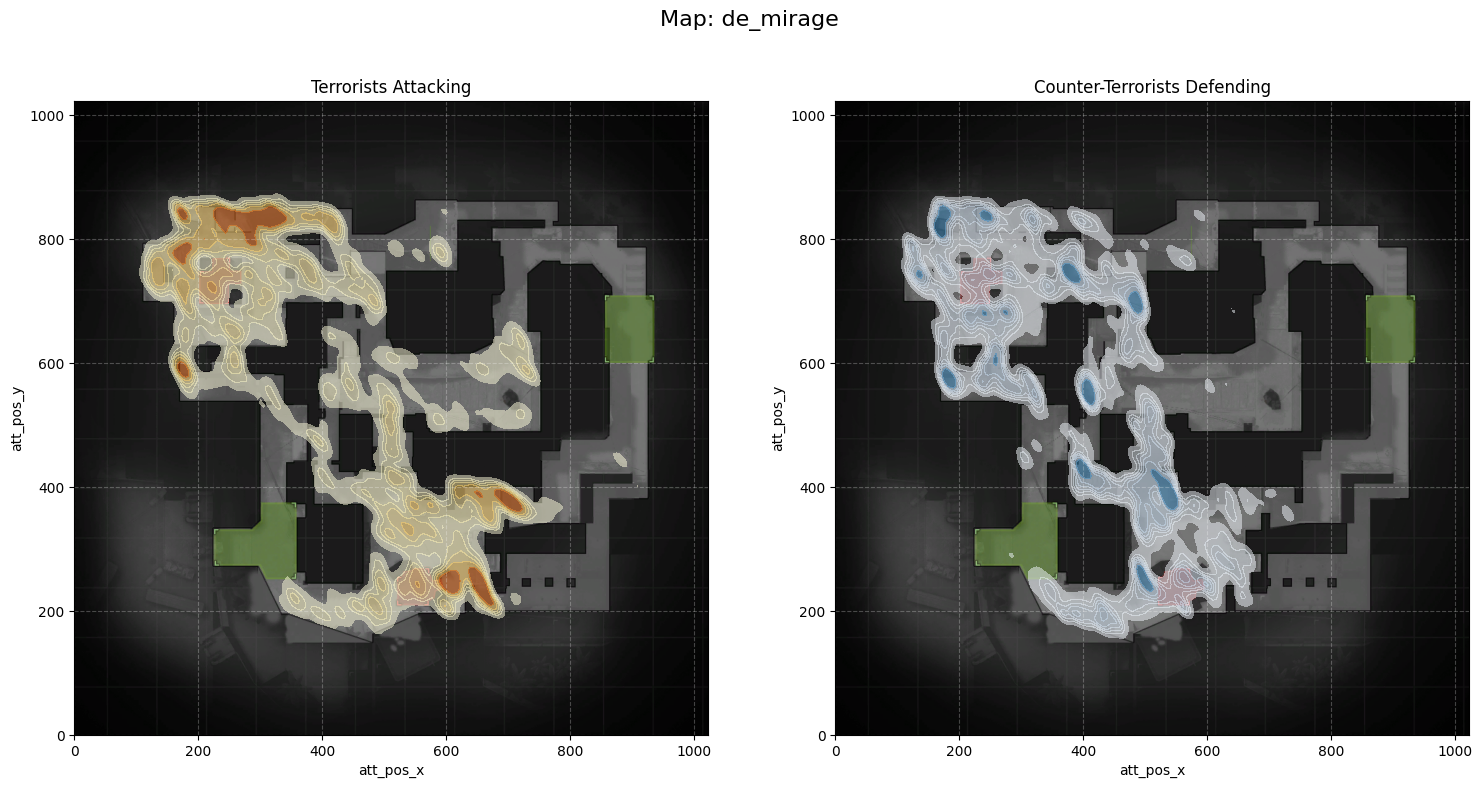

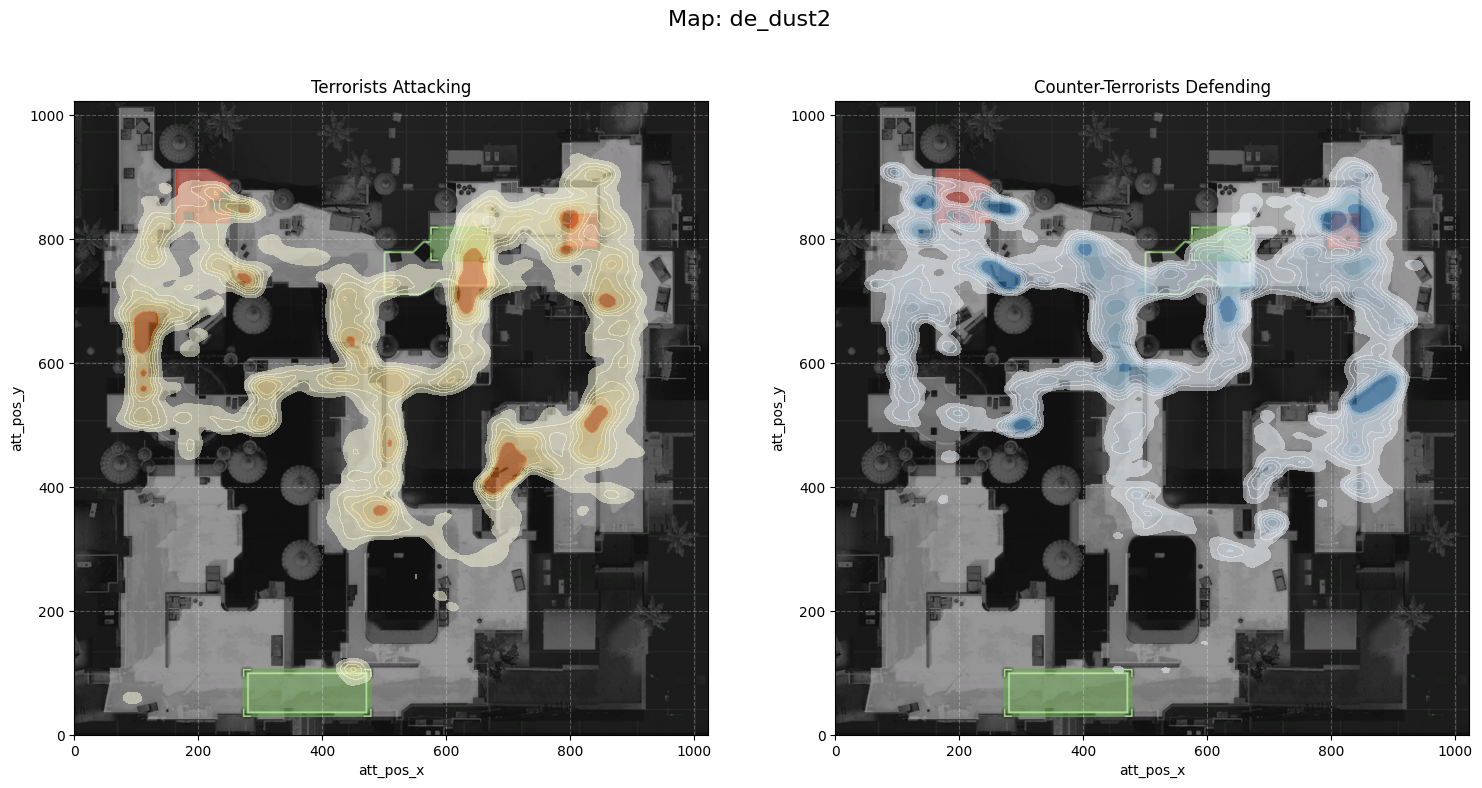

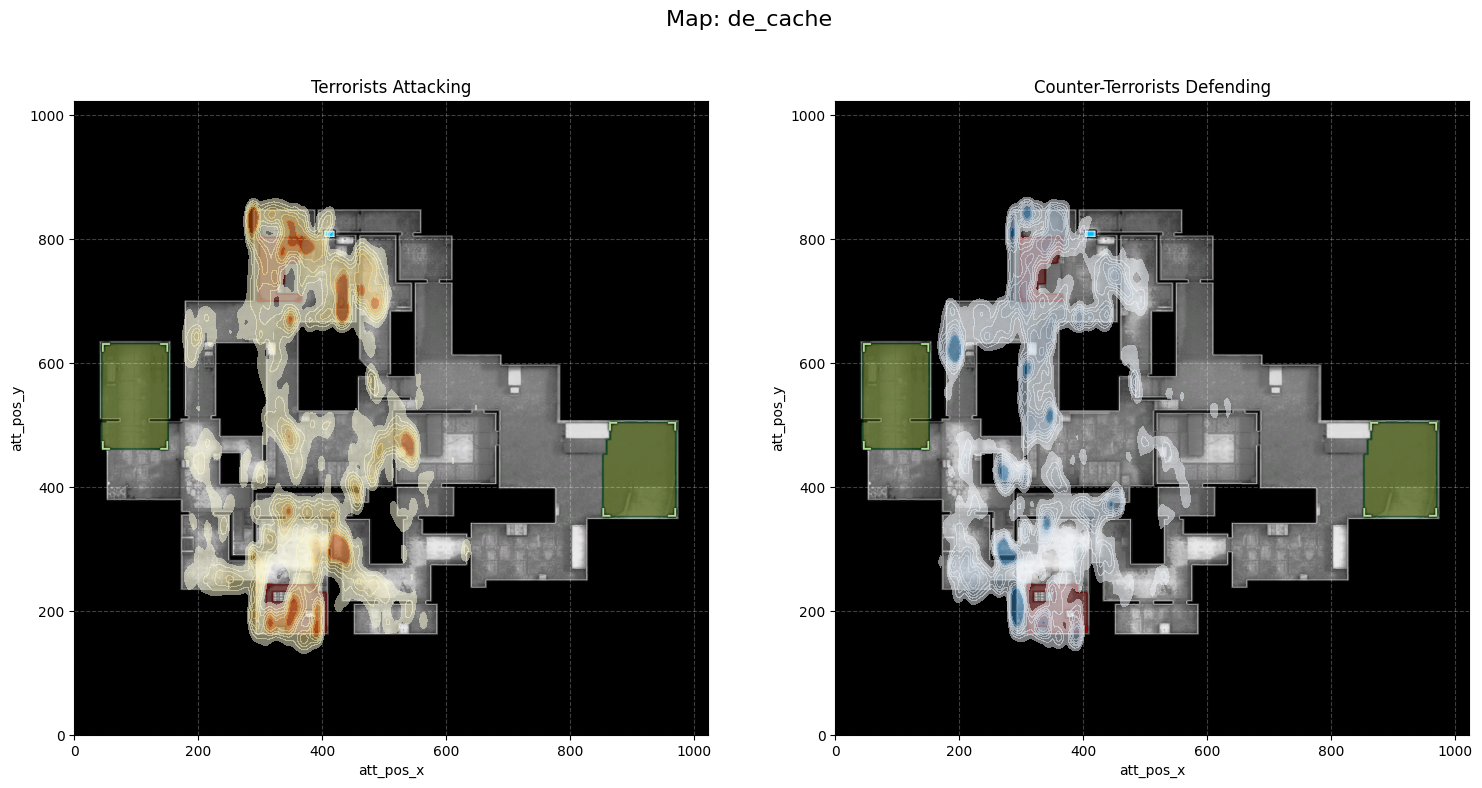

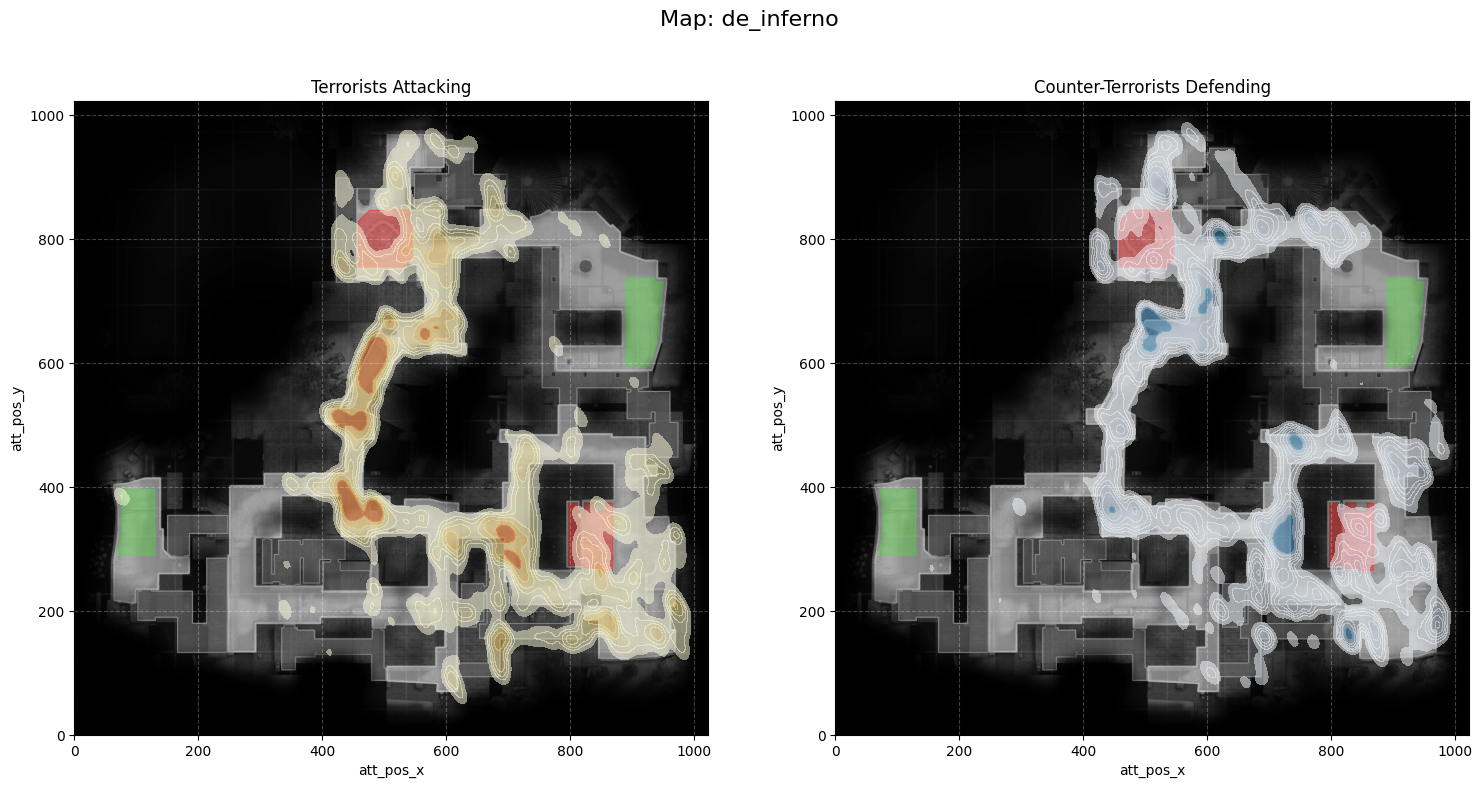

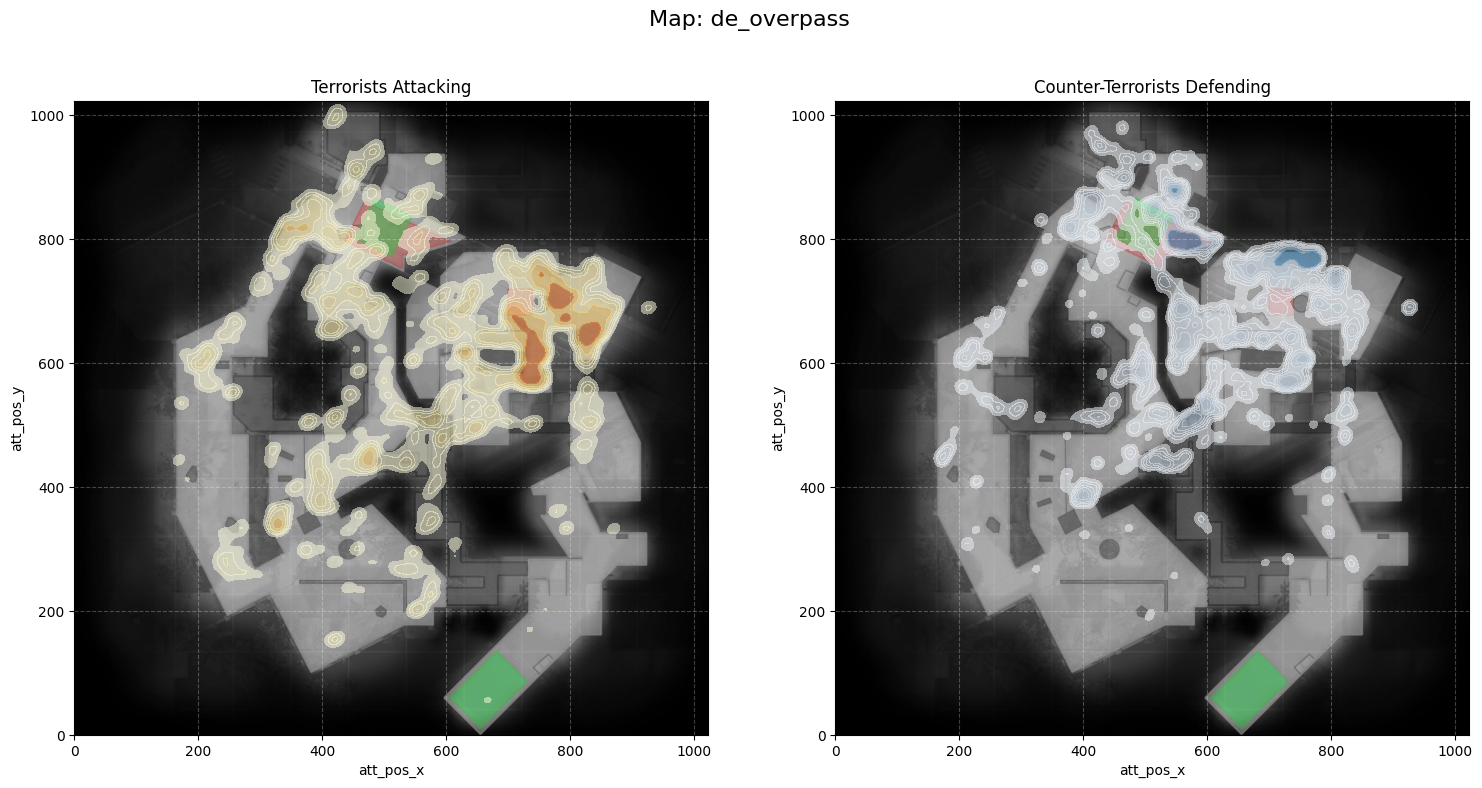

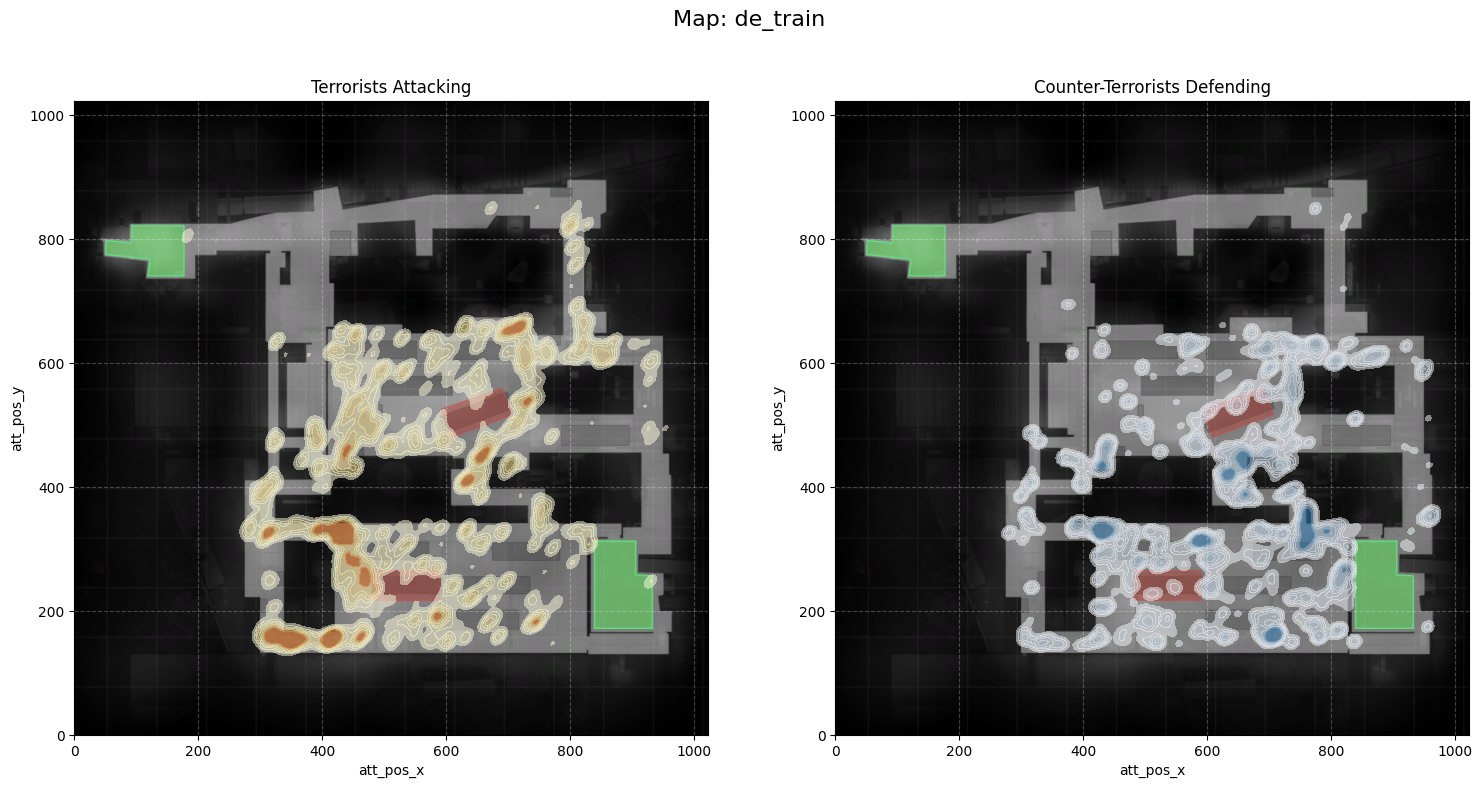

In [25]:
for i in smap:
    bg = imread(fr'{i}.png')
    plot_df_t, plot_df_ct = filterHeatMap(master_demos,map_data,round_type,maps_mm,i)
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,16))
    fig.suptitle(f'Map: {i}', fontsize=16, y=0.75)
    ax1.grid(visible=True, which='major', color='w', linestyle='--', alpha=0.25)
    ax1.imshow(bg, zorder=0, extent=[0.0, 1024, 0., 1024])
    ax1.set_xlim(0, 1024)
    ax1.set_ylim(0, 1024)
    ax2.grid(visible=True, which='major', color='w', linestyle='--', alpha=0.25)
    ax2.imshow(bg, zorder=0, extent=[0.0, 1024, 0., 1024])
    ax2.set_xlim(0, 1024)
    ax2.set_ylim(0, 1024)

    sns.kdeplot(x=(plot_df_t['att_pos_x']), y=(plot_df_t['att_pos_y']), cmap='YlOrBr', alpha=0.5,ax=ax1,
        thresh=0.1,          
        levels=7,
        fill=True,
        bw_method=0.05)
    ax1.set_title('Terrorists Attacking')

    sns.kdeplot(x=plot_df_ct['att_pos_x'], y=plot_df_ct['att_pos_y'], cmap='Blues', alpha=0.5, ax=ax2,
        thresh=0.1,               
        levels=8,               
        fill=True,                
        bw_method=0.05)
    ax2.set_title('Counter-Terrorists Defending')